CLEANING DATA

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('city_temperature.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [3]:
df.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


In [4]:
list(df.columns.values)

['Region',
 'Country',
 'State',
 'City',
 'Month',
 'Day',
 'Year',
 'AvgTemperature']

In [5]:
print(df[(df["Year"]== 2010) &(df["Country"]== "Cyprus")])

        Region Country State     City  Month  Day  Year  AvgTemperature
684450  Europe  Cyprus   NaN  Nicosia      1    1  2010           -99.0
684451  Europe  Cyprus   NaN  Nicosia      1    2  2010           -99.0
684452  Europe  Cyprus   NaN  Nicosia      1    3  2010           -99.0
684453  Europe  Cyprus   NaN  Nicosia      1    4  2010           -99.0
684454  Europe  Cyprus   NaN  Nicosia      1    5  2010           -99.0
...        ...     ...   ...      ...    ...  ...   ...             ...
684617  Europe  Cyprus   NaN  Nicosia      6   17  2010           -99.0
684618  Europe  Cyprus   NaN  Nicosia      6   18  2010           -99.0
684619  Europe  Cyprus   NaN  Nicosia      6   19  2010           -99.0
684620  Europe  Cyprus   NaN  Nicosia      6   20  2010           -99.0
684621  Europe  Cyprus   NaN  Nicosia      6   21  2010            90.1

[172 rows x 8 columns]


Checking for null and duplicates values

In [6]:
print("The missing values are:\n{}".format(df.isnull().sum()))
print("\nThe duplicated values are:{}".format(len(df[df.duplicated()])))

The missing values are:
Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

The duplicated values are:20715


Removing null and duplicate values from dataset

In [7]:
df = df.drop('State', axis=1)
df = df.drop_duplicates()
print("The missing values are:\n{}".format(df.isnull().sum()))
print("\nThe duplicated values are:{}".format(len(df[df.duplicated()])))

The missing values are:
Region            0
Country           0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64

The duplicated values are:0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885424 entries, 0 to 2906326
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   City            object 
 3   Month           int64  
 4   Day             int64  
 5   Year            int64  
 6   AvgTemperature  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 176.1+ MB


In [9]:
df.describe()

,Month,Day,Year,AvgTemperature
count,2.885424e+06,2.885424e+06,2.885424e+06,2.885424e+06
mean,6.469008e+00,1.571671e+01,2.006707e+03,5.601840e+01
std,3.456462e+00,8.800542e+00,1.965766e+01,3.214570e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.560000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


Removing outliners

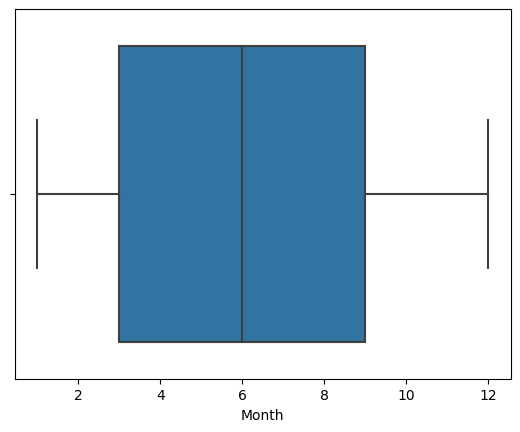

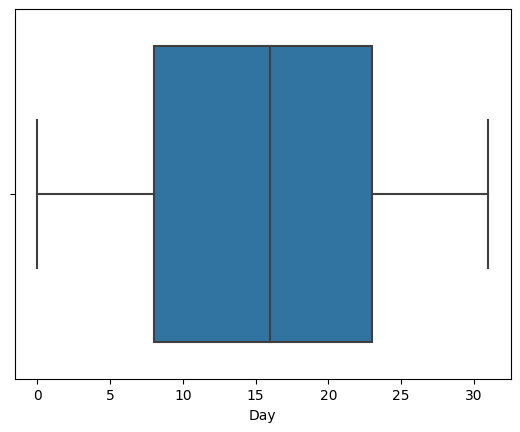

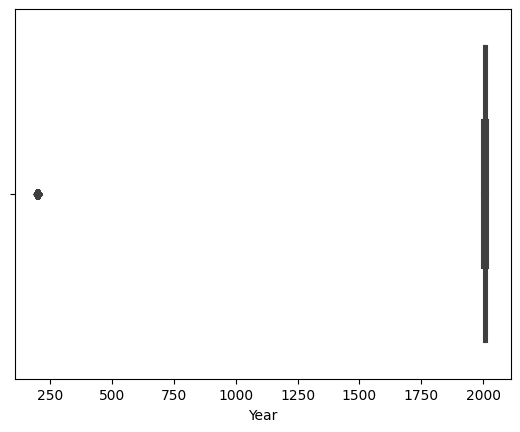

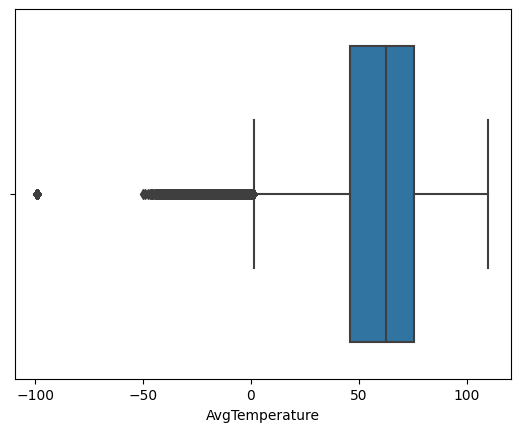

In [10]:
for i in df[['Month', 'Day', 'Year', 'AvgTemperature']]:
    plt.figure()
    sns.boxplot(df, x=df[i], orient="h")

In [11]:
df.groupby('Year')['AvgTemperature'].count()

Year
200         60
201        235
1995    117880
1996    118210
1997    117921
1998    118334
1999    118616
2000    118946
2001    118618
2002    118601
2003    118405
2004    117910
2005    117158
2006    116910
2007    114677
2008    113818
2009    113508
2010    114526
2011    112308
2012    111256
2013    110284
2014    108284
2015    106763
2016    106499
2017    106209
2018    105657
2019    105290
2020     38541
Name: AvgTemperature, dtype: int64

In [12]:
df = df[df['Day'] > 0]
df = df[df['Year'] > 1994]
df = df[df['Year'] < 2020]
df = df[df['AvgTemperature'] > -70]


Correcting formats

In [13]:
df['AvgTemperature'] = (df['AvgTemperature'] - 32)*(5/9) #F to C
df['Date'] = pd.to_datetime(df[['Year','Month','Day']])

In [14]:
df

,Region,Country,City,Month,Day,Year,AvgTemperature,Date
0,Africa,Algeria,Algiers,1,1,1995,17.888889,1995-01-01
1,Africa,Algeria,Algiers,1,2,1995,9.666667,1995-01-02
2,Africa,Algeria,Algiers,1,3,1995,9.333333,1995-01-03
3,Africa,Algeria,Algiers,1,4,1995,8.000000,1995-01-04
4,Africa,Algeria,Algiers,1,5,1995,8.833333,1995-01-05
...,...,...,...,...,...,...,...,...
2906322,North America,US,San Juan Puerto Rico,7,27,2013,28.000000,2013-07-27
2906323,North America,US,San Juan Puerto Rico,7,28,2013,27.555556,2013-07-28
2906324,North America,US,San Juan Puerto Rico,7,29,2013,29.000000,2013-07-29
2906325,North America,US,San Juan Puerto Rico,7,30,2013,28.777778,2013-07-30


In [15]:
df.to_csv('cleaned_city_temperature.csv', index=False)